In [2]:
import os
import time
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# read data files
train_df = pd.read_csv("train.csv", header='infer')
test_df = pd.read_csv("test.csv", header='infer')
submission = pd.read_csv('sample_submission.csv', header='infer')
original_df = pd.read_csv('original_data.csv', header='infer', sep=";")

In [4]:
train_df

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,3116940,e,9.29,f,NaN,n,t,NaN,NaN,w,...,b,NaN,w,u,w,t,g,NaN,d,u
3116941,3116941,e,10.88,s,NaN,w,t,d,c,p,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
3116942,3116942,p,7.82,x,e,e,f,a,NaN,w,...,NaN,NaN,y,NaN,w,t,z,NaN,d,a
3116943,3116943,e,9.45,p,i,n,t,e,NaN,p,...,NaN,y,w,NaN,NaN,t,p,NaN,d,u


In [5]:
test_df

,id,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,3116945,8.64,x,NaN,n,t,NaN,NaN,w,11.13,...,b,NaN,w,u,w,t,g,NaN,d,a
1,3116946,6.90,o,t,o,f,NaN,c,y,1.27,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,a
2,3116947,2.00,b,g,n,f,NaN,c,n,6.18,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,s
3,3116948,3.47,x,t,n,f,s,c,n,4.98,...,NaN,NaN,w,NaN,n,t,z,NaN,d,u
4,3116949,6.17,x,h,y,f,p,NaN,y,6.73,...,NaN,NaN,y,NaN,y,t,NaN,NaN,d,u
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2077959,5194904,0.88,x,g,w,f,a,d,w,2.67,...,NaN,NaN,e,NaN,NaN,f,f,NaN,d,u
2077960,5194905,3.12,x,s,w,f,d,c,w,2.69,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a
2077961,5194906,5.73,x,e,e,f,a,NaN,w,6.16,...,NaN,NaN,y,NaN,w,t,z,NaN,d,a
2077962,5194907,5.03,b,g,n,f,a,d,g,6.00,...,NaN,s,g,NaN,NaN,f,f,NaN,d,a


In [6]:
original_df

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,p,1.18,s,s,y,f,f,f,f,3.93,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61065,p,1.27,f,s,y,f,f,f,f,3.18,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61066,p,1.27,s,s,y,f,f,f,f,3.86,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61067,p,1.24,f,s,y,f,f,f,f,3.56,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u


## Dropping the column 'id' from train_df and test_df

In [7]:
train_df.drop('id', inplace=True, axis=1)
test_df.drop('id', inplace=True, axis=1)

In [8]:
train_df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,e,8.80,f,s,u,f,a,c,w,4.51,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,p,4.51,x,h,o,f,a,c,n,4.79,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,e,6.94,f,s,b,f,x,c,w,6.85,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,e,3.88,f,y,g,f,s,NaN,g,4.16,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,e,5.85,x,l,w,f,d,NaN,w,3.37,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


In [9]:
test_df.head()

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,8.64,x,NaN,n,t,NaN,NaN,w,11.13,17.12,b,NaN,w,u,w,t,g,NaN,d,a
1,6.90,o,t,o,f,NaN,c,y,1.27,10.75,NaN,NaN,n,NaN,NaN,f,f,NaN,d,a
2,2.00,b,g,n,f,NaN,c,n,6.18,3.14,NaN,NaN,n,NaN,NaN,f,f,NaN,d,s
3,3.47,x,t,n,f,s,c,n,4.98,8.51,NaN,NaN,w,NaN,n,t,z,NaN,d,u
4,6.17,x,h,y,f,p,NaN,y,6.73,13.70,NaN,NaN,y,NaN,y,t,NaN,NaN,d,u


## Concatenating train_df and original_df and removing any duplicate rows

In [10]:
train_final_df = pd.concat([train_df, original_df],
                           ignore_index=True).drop_duplicates()
train_final_df

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,e,8.80,f,s,u,f,a,c,w,4.51,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,p,4.51,x,h,o,f,a,c,n,4.79,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,e,6.94,f,s,b,f,x,c,w,6.85,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,e,3.88,f,y,g,f,s,NaN,g,4.16,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,e,5.85,x,l,w,f,d,NaN,w,3.37,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3178009,p,1.18,s,s,y,f,f,f,f,3.93,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
3178010,p,1.27,f,s,y,f,f,f,f,3.18,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
3178011,p,1.27,s,s,y,f,f,f,f,3.86,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
3178012,p,1.24,f,s,y,f,f,f,f,3.56,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u


## Distribution of Target

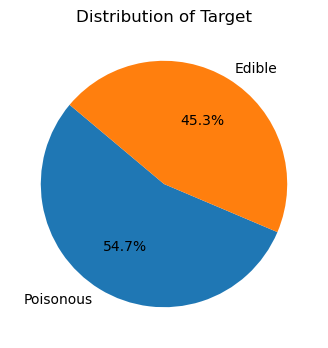

In [11]:
value_counts = train_final_df['class'].value_counts()
percentages = 100 * value_counts / len(train_final_df)
label_mapping = {'e': 'Edible', 'p': 'Poisonous'}
labels = [label_mapping[val] for val in percentages.index]

plt.figure(figsize=(4, 4))
plt.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Target')
plt.show()

## Number of unique values in columns

In [12]:
train_final_df.nunique()

class                      2
cap-diameter            3914
cap-shape                 74
cap-surface               83
cap-color                 78
does-bruise-or-bleed      26
gill-attachment           78
gill-spacing              48
gill-color                63
stem-height             2758
stem-width              5936
stem-root                 38
stem-surface              60
stem-color                59
veil-type                 22
veil-color                24
has-ring                  23
ring-type                 40
spore-print-color         32
habitat                   52
season                     4
dtype: int64

In [13]:
for column in train_final_df.columns:
    unique_values = train_final_df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")
    print('---------------')

Unique values in column 'class': ['e' 'p']
---------------
Unique values in column 'cap-diameter': [ 8.8   4.51  6.94 ... 55.63 54.07 62.34]
---------------
Unique values in column 'cap-shape': ['f' 'x' 'p' 'b' 'o' 'c' 's' 'd' 'e' 'n' nan 'w' 'k' 'l' '19.29' '5 f' 't'
 'g' 'z' 'a' '2.85' '7 x' 'r' 'u' '3.55' 'is s' 'y' '4.22' '3.6' '21.56'
 'i' '6 x' '24.16' '8' 'm' 'ring-type' '10.13' 'is p' '7.43' 'h' '0.82'
 '10.46' '2.77' '2.94' '12.62' '5.15' '19.04' '4.97' '49.21' 'b f' '9.13'
 '1.66' '3.37' '7.21' '3.25' '11.12' '3 x' '4.3' '7.41' '6.21' '8.29'
 '54.78' '20.25' '3.52' '3.04' '2.63' '3.91' '6.44' '8.3' '7.6' '17.44'
 '4.33' '2.82' '6.53' '19.06']
---------------
Unique values in column 'cap-surface': ['s' 'h' 'y' 'l' 't' 'e' 'g' nan 'd' 'i' 'w' 'k' '15.94' 'f' 'n' 'r' 'o'
 'a' 'u' 'z' '2.7' 'does l' '5.07' 'p' 'b' 'm' 'cap-diameter' '1.43' 'x'
 '7.14' 'c' 'is h' 'does t' '0.85' '6.57' '12.79' '6.45' '4.66' '23.18'
 '3.06' '16.39' '4.21' 'veil-color' '11.78' '8.1' 'has-ring' 'does

### Handling Categorical Variables

Certain `object` type variables in our dataset have an excessive number of categories, likely classified by alphabetical characters. To address this:

1. **Replace Non-Alphabetical Values**: Values that do not contain letters will be replaced with `NaN`.

2. **Impute Missing Values**: We'll fill `NaN` values with the median for numerical features and the mode for categorical features.

This ensures more consistent and meaningful data for analysis.


In [14]:
object_columns = [
    col for col in train_final_df.columns if train_final_df[col].dtype == 'object']
alphabets = set([chr(i) for i in range(97, 123)])


def filter_alpha(value):
    if isinstance(value, str):
        return value if len(value) == 1 and value in alphabets else np.nan
    return np.nan


for col in object_columns:
    train_final_df[col] = train_final_df[col].apply(filter_alpha)

### Unique Values After Filtering

After applying the filtering code, the following will be the unique values of each categorical column. This process ensures that only single alphabetical characters remain, with all other values replaced by `NaN`.


In [15]:
for column in train_final_df.columns:
    unique_values = train_final_df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")
    print('---------------')

Unique values in column 'class': ['e' 'p']
---------------
Unique values in column 'cap-diameter': [ 8.8   4.51  6.94 ... 55.63 54.07 62.34]
---------------
Unique values in column 'cap-shape': ['f' 'x' 'p' 'b' 'o' 'c' 's' 'd' 'e' 'n' nan 'w' 'k' 'l' 't' 'g' 'z' 'a'
 'r' 'u' 'y' 'i' 'm' 'h']
---------------
Unique values in column 'cap-surface': ['s' 'h' 'y' 'l' 't' 'e' 'g' nan 'd' 'i' 'w' 'k' 'f' 'n' 'r' 'o' 'a' 'u'
 'z' 'p' 'b' 'm' 'x' 'c']
---------------
Unique values in column 'cap-color': ['u' 'o' 'b' 'g' 'w' 'n' 'e' 'y' 'r' 'p' 'k' 'l' 'i' 'h' 'd' 's' 'a' 'f'
 nan 'c' 'x' 'm' 'z' 't']
---------------
Unique values in column 'does-bruise-or-bleed': ['f' 't' 'd' nan 'w' 'o' 'b' 'x' 'p' 'g' 'y' 'r' 'a' 'l' 'i' 'c' 'n' 'z'
 's' 'k' 'h' 'e' 'u']
---------------
Unique values in column 'gill-attachment': ['a' 'x' 's' 'd' 'e' nan 'f' 'p' 'l' 'm' 'b' 'n' 'g' 'i' 'u' 't' 'o' 'c'
 'w' 'k' 'r' 'h' 'z' 'y']
---------------
Unique values in column 'gill-spacing': ['c' nan 'd' 'f' 'x' 'b' 'a'

### Converting Data Types

This function, `converting_datatypes(df)`, optimizes the memory usage of the DataFrame by converting column data types:

- **Object Columns**: Converts columns with `object` data types to `category`, which is more memory-efficient for categorical data.
- **Integer Columns**: Converts columns with `int64` data types to `int32` to reduce memory usage.
- **Float Columns**: Converts columns with `float64` data types to `float32` to save memory.

The function returns a new DataFrame with these optimized data types.


In [16]:
def converting_datatypes(df):
    df = df.copy()

    # Converting data types
    object_columns = [col for col in df.columns if df[col].dtype == 'object']
    int_columns = [col for col in df.columns if df[col].dtype == 'int64']
    float_columns = [col for col in df.columns if df[col].dtype == 'float64']
    for col in object_columns:
        df[col]=df[col].astype('category')
    for col in int_columns:
        df[col]=df[col].astype('int32')
    for col in float_columns:
        df[col]=df[col].astype('float32')
    return df

### Before Data type conversion

In [17]:
train_final_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 3177868 entries, 0 to 3178013
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   class                 object 
 1   cap-diameter          float64
 2   cap-shape             object 
 3   cap-surface           object 
 4   cap-color             object 
 5   does-bruise-or-bleed  object 
 6   gill-attachment       object 
 7   gill-spacing          object 
 8   gill-color            object 
 9   stem-height           float64
 10  stem-width            float64
 11  stem-root             object 
 12  stem-surface          object 
 13  stem-color            object 
 14  veil-type             object 
 15  veil-color            object 
 16  has-ring              object 
 17  ring-type             object 
 18  spore-print-color     object 
 19  habitat               object 
 20  season                object 
dtypes: float64(3), object(18)
memory usage: 2.5 GB


In [18]:
train_final_df=converting_datatypes(train_final_df)

### After Data type conversion

In [19]:
train_final_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 3177868 entries, 0 to 3178013
Data columns (total 21 columns):
 #   Column                Dtype   
---  ------                -----   
 0   class                 category
 1   cap-diameter          float32 
 2   cap-shape             category
 3   cap-surface           category
 4   cap-color             category
 5   does-bruise-or-bleed  category
 6   gill-attachment       category
 7   gill-spacing          category
 8   gill-color            category
 9   stem-height           float32 
 10  stem-width            float32 
 11  stem-root             category
 12  stem-surface          category
 13  stem-color            category
 14  veil-type             category
 15  veil-color            category
 16  has-ring              category
 17  ring-type             category
 18  spore-print-color     category
 19  habitat               category
 20  season                category
dtypes: category(18), float32(3)
memory usage: 115.2 MB


### Checking for Missing Values

The commented-out code snippets below are used to check for missing values in the `train_final_df` DataFrame:

- `train_final_df.isnull().sum()`: This command returns the count of `NaN` values in each column of the DataFrame.
- `train_final_df.isna().sum()`: This is an equivalent method to check for missing values, as `isna()` is a synonym for `isnull()`.

Both methods help identify columns with missing data, which can then be handled appropriately in the data preprocessing steps.


In [20]:
train_final_df.isnull().sum()

class                         0
cap-diameter                  4
cap-shape                    95
cap-surface              685216
cap-color                    84
does-bruise-or-bleed         12
gill-attachment          533851
gill-spacing            1283528
gill-color                  124
stem-height                   0
stem-width                    0
stem-root               2808574
stem-surface            2019030
stem-color                   78
veil-type               3015242
veil-color              2794460
has-ring                     26
ring-type                131378
spore-print-color       2904290
habitat                      83
season                        0
dtype: int64

## Count plots of Categorical Columns

In [21]:
# os.makedirs('EDA', exist_ok=True)

# n_cols = 2
# n_rows = (len(object_columns) + n_cols - 1) // n_cols
# fig, axes = plt.subplots(n_rows, n_cols, figsize=(60, n_rows * 20))
# axes = axes.flatten()

# for i, column in enumerate(object_columns):
#     ax = sns.countplot(data=train_final_df, x=column, ax=axes[i], palette='viridis')
#     ax.set_title(f'Count Plot for {column}', fontsize=24, weight='bold')
#     ax.set_xlabel(column, fontsize=18, weight='bold')
#     ax.set_ylabel('Count', fontsize=18, weight='bold')
#     ax.tick_params(axis='x', rotation=45, labelsize=14)
#     ax.tick_params(axis='y', labelsize=14)

#     # Add count labels on bars
#     for container in ax.containers:
#         ax.bar_label(container, fontsize=14, weight='bold')

# # Remove unused subplots
# for j in range(len(object_columns), len(axes)):
#     fig.delaxes(axes[j])

# # Adjust layout and save the entire figure as a single image
# plt.tight_layout()
# plt.savefig('EDA/complete_count_plots.png', bbox_inches='tight')

# plt.show()


os.makedirs('EDA', exist_ok=True)

n_cols = 2
n_rows = (len(object_columns) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(100, n_rows * 15))
axes = axes.flatten()

for i, column in enumerate(object_columns):
    ax = sns.countplot(data=train_final_df, x=column, ax=axes[i], palette='viridis')
    ax.set_title(f'Count Plot for {column}', fontsize=24, weight='bold')
    ax.set_xlabel(column, fontsize=18, weight='bold')
    ax.set_ylabel('Count', fontsize=18, weight='bold')
    ax.tick_params(axis='x', labelsize=14)
    # ax.tick_params(axis='x', rotation=45, labelsize=14)
    ax.tick_params(axis='y', labelsize=14)

    # Get the y-axis limits and calculate half of the plot height
    y_min, y_max = ax.get_ylim()
    half_height = (y_max - y_min) / 3
    padding=''
    # Add count labels on bars
    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            bar_center_x = bar.get_x() + bar.get_width() / 2
            if height >= half_height:
                # Place label at the center of the bar
                label_y = height / 2
            else:
                # Place label above the bar with padding
                label_y = height + 30
                padding='  '

            ax.text(bar_center_x, label_y,
                    f'{padding}{int(height)}', ha='center', va='bottom' if height < half_height else 'center',
                    fontsize=14, weight='bold', rotation=90, color='black')

    # Save each subplot as an individual image
    fig_single, ax_single = plt.subplots(figsize=(10, 6))
    sns.countplot(data=train_final_df, x=column, ax=ax_single, palette='viridis')
    ax_single.set_title(f'Count Plot for {column}', fontsize=24, weight='bold')
    ax_single.set_xlabel(column, fontsize=18, weight='bold')
    ax_single.set_ylabel('Count', fontsize=18, weight='bold')
    ax_single.tick_params(axis='x', labelsize=14)
    # ax_single.tick_params(axis='x', rotation=45, labelsize=14)
    ax_single.tick_params(axis='y', labelsize=14)

    # Add count labels on bars
    for container in ax_single.containers:
        for bar in container:
            height = bar.get_height()
            bar_center_x = bar.get_x() + bar.get_width() / 2
            if height >= half_height:
                # Place label at the center of the bar
                label_y = height / 2
            else:
                # Place label above the bar with padding
                label_y = height + 100
                padding='  '

            ax_single.text(bar_center_x, label_y,
                           f'{padding}{int(height)}', ha='center', va='bottom' if height < half_height else 'center',
                           fontsize=14, weight='bold', rotation=90, color='black')

    plt.tight_layout()
    plt.savefig(f'EDA/{column}_countplot.png', bbox_inches='tight')
    plt.close(fig_single)

# Remove unused subplots from the main figure
for j in range(len(object_columns), len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.savefig('EDA/complete_count_plots.png', bbox_inches='tight')
plt.show()

In [22]:
null_percentage = (train_final_df.isnull().sum() / len(train_final_df)) * 100
n_miss = train_final_df.isnull().sum()
missing_df = pd.DataFrame({'n_miss': n_miss, 'Null Percentage': null_percentage})
missing_df = missing_df.sort_values(by='n_miss', ascending=False)
missing_df

,n_miss,Null Percentage
veil-type,3015242,94.882544
spore-print-color,2904290,91.391147
stem-root,2808574,88.379190
veil-color,2794460,87.935056
stem-surface,2019030,63.534105
gill-spacing,1283528,40.389595
cap-surface,685216,21.562129
gill-attachment,533851,16.799030
ring-type,131378,4.134155
gill-color,124,0.003902


### Dropping Columns with Excessive Missing Values

Columns with more than 80% missing values are often not useful for analysis or model training. In this case, the following columns have been identified with over 80% null values and will be removed from the dataset:

- `veil-type`
- `spore-print-color`
- `stem-root`
- `veil-color`

The columns have been dropped from the dataset to ensure cleaner and more manageable data.



In [24]:
train_final_df.drop(['veil-type','spore-print-color','stem-root','veil-color'], inplace=True,axis=1)

In [25]:
train_final_df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-surface,stem-color,has-ring,ring-type,habitat,season
0,e,8.80,f,s,u,f,a,c,w,4.51,15.39,NaN,w,f,f,d,a
1,p,4.51,x,h,o,f,a,c,n,4.79,6.48,y,o,t,z,d,w
2,e,6.94,f,s,b,f,x,c,w,6.85,9.93,s,n,f,f,l,w
3,e,3.88,f,y,g,f,s,NaN,g,4.16,6.53,NaN,w,f,f,d,u
4,e,5.85,x,l,w,f,d,NaN,w,3.37,8.36,NaN,w,f,f,g,a


### Check the outliers of in numerical variables

In [28]:
numerical_columns = [col for col in train_final_df.columns if train_final_df[col].dtype == 'float32']
numerical_columns

['cap-diameter', 'stem-height', 'stem-width']

### Distribution of Numerical Features

### Scatter Plots of Numerical Features

The scatter plots below illustrate the relationships between pairs of numerical features in the dataset, colored by the target variable `'class'`. Each plot helps in visualizing the correlation and distribution between different pairs of numerical features.

The plots have been saved individually in the `EDA` folder with filenames indicating the feature pairs.


In [30]:
os.makedirs('EDA', exist_ok=True)

for i in range(len(numerical_columns)):
    for j in range(i + 1, len(numerical_columns)):
        plt.figure(figsize=(10, 6))
        ax = sns.scatterplot(data=train_final_df, x=numerical_columns[i], y=numerical_columns[j], hue='class', palette='viridis', s=100, alpha=0.7)
        ax.set_title(f'Scatter Plot of {numerical_columns[i]} vs {numerical_columns[j]}', fontsize=20, weight='bold')
        ax.set_xlabel(numerical_columns[i], fontsize=16, weight='bold')
        ax.set_ylabel(numerical_columns[j], fontsize=16, weight='bold')
        ax.legend(title='Class', title_fontsize='13', fontsize='12')
        plt.grid(True)
        plt.tight_layout()
        
        # Save the scatter plot with a meaningful filename
        filename = f'EDA/{numerical_columns[i]}_vs_{numerical_columns[j]}_scatterplot.png'
        plt.savefig(filename, bbox_inches='tight')
        plt.close()